In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
import numpy as np
from sklearn.utils import resample
from sklearn import impute
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from datetime import datetime
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score



import business_default_classifier as bdc

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


: 

In [ ]:
raw_dataset = pd.read_csv("raw_data/dataset 1.00.csv")
raw_dataset = raw_dataset[:100]

X_train, X_test, y_train, y_test = bdc.preprocess(raw_dataset)

2025-03-31 18:09:53.552468 preprocess forme juridique
2025-03-31 18:12:14.947077 remove useless columns


In [ ]:
pd.set_option('display.max_columns', 500)
X_test.head(10)
X_test.shape

(374134, 130)

# Logistic regression

/home/psels/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



----MODEL PERFORMANCE----
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    363152
           1       0.17      0.55      0.26     10982

    accuracy                           0.91    374134
   macro avg       0.58      0.73      0.61    374134
weighted avg       0.96      0.91      0.93    374134


----CROSS-VALIDATION RECALL----


/home/psels/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/psels/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Mean recall: 0.5477


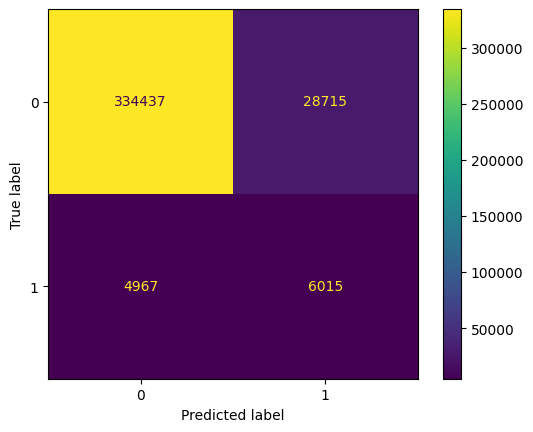

In [ ]:

# print(datetime.now(), "start training")
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)
# print(datetime.now(), "end training")

model = LogisticRegression()

    # Train the model
model.fit(
        X_train, y_train,

    )


 # Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Performance evaluation
print("\n----MODEL PERFORMANCE----")
print(classification_report(y_test, y_pred))

print("\n----CROSS-VALIDATION RECALL----")
cv_results = cross_val_score(model, X_train, y_train, scoring=make_scorer(recall_score), cv=5)
print(f"Mean recall: {cv_results.mean():.4f}")

# Confusion matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# # Get feature importance
# importance = model.feature_importances_
# feature_importance = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': importance
# }).sort_values('Importance', ascending=False)

# print("\n----TOP 10 MOST IMPORTANT FEATURES----")
# print(feature_importance.head(10))

# # Try adjusting prediction threshold to improve recall
# print("\n----THRESHOLD ADJUSTMENT----")
# best_threshold = 0.5
# best_f1 = 0

# for threshold in np.arange(0.1, 0.9, 0.05):
#     y_pred_threshold = (y_pred_proba >= threshold).astype(int)
#     f1 = f1_score(y_test, y_pred_threshold)
#     recall = recall_score(y_test, y_pred_threshold)
#     precision = precision_score(y_test, y_pred_threshold)

#     print(f"Threshold: {threshold:.2f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

#     if f1 > best_f1:
#         best_f1 = f1
#         best_threshold = threshold

# print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")

# # Final model with optimal threshold
# y_pred_final = (y_pred_proba >= best_threshold).astype(int)
# print("\n----FINAL MODEL PERFORMANCE----")
# print(classification_report(y_test, y_pred_final))

# XGBoost classifier

/home/psels/.pyenv/versions/lewagon/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.65616
[1]	validation_0-logloss:0.61556
[2]	validation_0-logloss:0.58199
[3]	validation_0-logloss:0.55930
[4]	validation_0-logloss:0.53441
[5]	validation_0-logloss:0.51301
[6]	validation_0-logloss:0.49679
[7]	validation_0-logloss:0.48449
[8]	validation_0-logloss:0.47195
[9]	validation_0-logloss:0.46131
[10]	validation_0-logloss:0.45204
[11]	validation_0-logloss:0.44130
[12]	validation_0-logloss:0.43481
[13]	validation_0-logloss:0.43230
[14]	validation_0-logloss:0.42434
[15]	validation_0-logloss:0.42018
[16]	validation_0-logloss:0.41594
[17]	validation_0-logloss:0.40956
[18]	validation_0-logloss:0.40402
[19]	validation_0-logloss:0.40109
[20]	validation_0-logloss:0.39707
[21]	validation_0-logloss:0.39446
[22]	validation_0-logloss:0.39105
[23]	validation_0-logloss:0.38838
[24]	validation_0-logloss:0.38573
[25]	validation_0-logloss:0.38337
[26]	validation_0-logloss:0.38133
[27]	validation_0-logloss:0.38008
[28]	validation_0-logloss:0.37831
[29]	validation_0-loglos

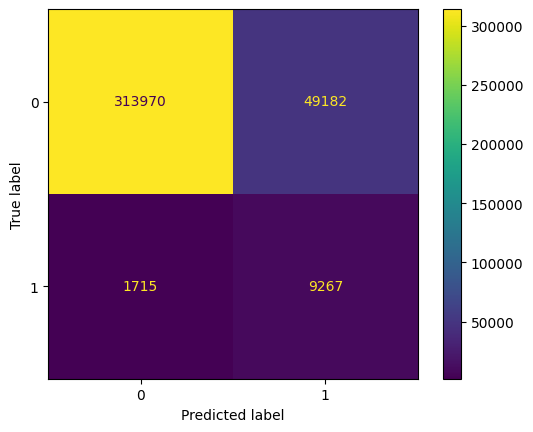

In [ ]:
# XGBoost classifier

model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=4,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=3,  # Helps with class imbalance
        random_state=42
    )

    # Train the model
model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=10,
        verbose=True
    )


 # Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Performance evaluation
print("\n----MODEL PERFORMANCE----")
print(classification_report(y_test, y_pred))

print("\n----CROSS-VALIDATION RECALL----")
cv_results = cross_val_score(model, X_train, y_train, scoring=make_scorer(recall_score), cv=5)
print(f"Mean recall: {cv_results.mean():.4f}")

# Confusion matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

cm_without_thresold = confusion_matrix(y_test, y_pred)

# Get feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print("\n----TOP 10 MOST IMPORTANT FEATURES----")
print(feature_importance.head(10))

# Try adjusting prediction threshold to improve recall
print("\n----THRESHOLD ADJUSTMENT----")
best_threshold = 0.5
best_f1 = 0

for threshold in np.arange(0.1, 0.9, 0.05):
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)

    print(f"Threshold: {threshold:.2f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold


# Do y_pred with bets thresold
y_pred_threshold = (y_pred_proba >= best_threshold).astype(int)
cm_with_thresold = confusion_matrix(y_test, y_pred_threshold)




print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")

# Final model with optimal threshold
y_pred_final = (y_pred_proba >= best_threshold).astype(int)
print("\n----FINAL MODEL PERFORMANCE----")
print(classification_report(y_test, y_pred_final))


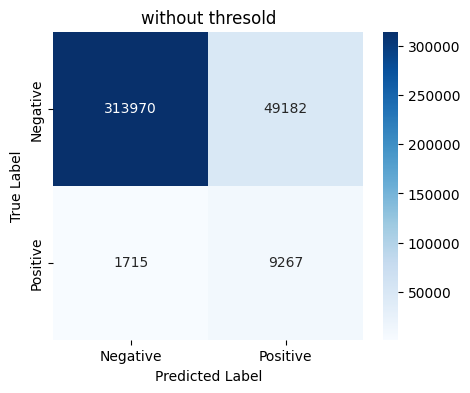

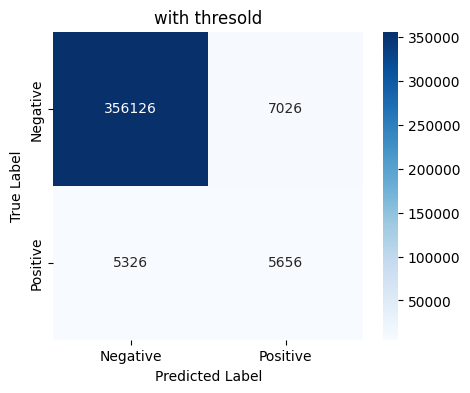

In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_without_thresold, "without thresold")
plot_confusion_matrix(cm_with_thresold, "with thresold")


# Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


----MODEL PERFORMANCE----
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    363152
           1       0.35      0.87      0.50     10982

    accuracy                           0.95    374134
   macro avg       0.68      0.91      0.74    374134
weighted avg       0.98      0.95      0.96    374134


----CROSS-VALIDATION RECALL----
Mean recall: 0.8574

----TOP 10 MOST IMPORTANT FEATURES----
                                        Feature  Importance
2                                  dateCreation    0.235559
10                                          lat    0.164739
11                                          lon    0.164265
6                               salarieEnFrance    0.133016
1                          diffusionCommerciale    0.103379
0                                  typePersonne    0.027445
28                      formeJuridique_1_1000.0    0.024551
23  formeExerciceActivitePrincipale_COMMERCIALE    0.012216
43           

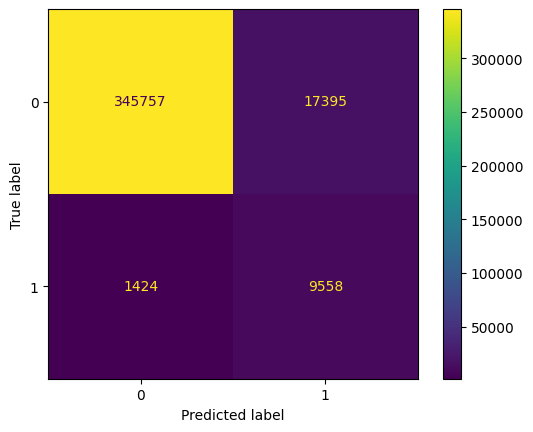

In [ ]:
# XGBoost classifier

model = RandomForestClassifier()

    # Train the model
model.fit(
        X_train, y_train,
    )


 # Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Performance evaluation
print("\n----MODEL PERFORMANCE----")
print(classification_report(y_test, y_pred))

print("\n----CROSS-VALIDATION RECALL----")
cv_results = cross_val_score(model, X_train, y_train, scoring=make_scorer(recall_score), cv=5)
print(f"Mean recall: {cv_results.mean():.4f}")

# Confusion matrix
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

cm_without_thresold = confusion_matrix(y_test, y_pred)

# Get feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print("\n----TOP 10 MOST IMPORTANT FEATURES----")
print(feature_importance.head(10))

# Try adjusting prediction threshold to improve recall
print("\n----THRESHOLD ADJUSTMENT----")
best_threshold = 0.5
best_f1 = 0

for threshold in np.arange(0.1, 0.9, 0.05):
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)

    print(f"Threshold: {threshold:.2f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold


# Do y_pred with bets thresold
y_pred_threshold = (y_pred_proba >= best_threshold).astype(int)
cm_with_thresold = confusion_matrix(y_test, y_pred_threshold)




print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")

# Final model with optimal threshold
y_pred_final = (y_pred_proba >= best_threshold).astype(int)
print("\n----FINAL MODEL PERFORMANCE----")
print(classification_report(y_test, y_pred_final))


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)